In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
dataset=pd.read_csv('heart.csv')


<AxesSubplot:xlabel='trestbps', ylabel='chol'>

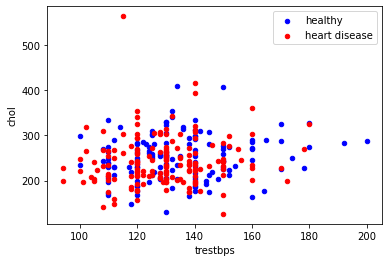

In [4]:

import matplotlib.pyplot as plt
healthy=dataset[dataset['target']==0][0:200]
heart_disease=dataset[dataset['target']==1][0:200]

# plot the healthy patinet with the number of blood pressure and cholestoral
axes=healthy.plot(kind='scatter',x="trestbps", y='chol',color='blue',label='healthy')

# plot the heart disease patinet with the number of blood pressure and cholestoral
heart_disease.plot(kind='scatter',x="trestbps", y='chol',color='red',label='heart disease',ax=axes)


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset['oldpeak']=dataset['oldpeak'].astype('int')
dataset.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int32
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [8]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1


In [9]:
#convert the dataset into numpy array
dataset=dataset.to_numpy()

In [10]:
#print the shape of the dataset
dataset.shape

(303, 14)

In [11]:
# lets test and train data 
training=dataset[0:200]
testing=dataset[200:]

In [12]:
#trained cells =200
#testing cells =103
print(training.shape)
print(testing.shape)

(200, 14)
(103, 14)


In [13]:
# seperate dataset to training and testing
# we are intrested inro all the rows and all the columns except the last one
training_features=training[:,0:-1]
testing_features=testing[:,0:-1]
#intrested in all rows and only consider the last coulmn
training_labels =training[:,-1]
testing_labels=testing[:,-1]




In [14]:
print(training_features.shape)
print(training_labels.shape)

(200, 13)
(200,)


In [15]:
#check the shape of the input in the neural network
training_features[0].shape

(13,)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [17]:
# NN layers 
model=Sequential()
# add the number of the rows that will be trained
model.add(Input(shape=(13,)))
# train the model on 26 layer
model.add(Dense(26,activation='relu'))
#randomly igonre some neurons during training *in order to increase accurecy 
model.add(Dropout(0.2))
model.add(Dense(13,activation='relu'))
model.add(Dropout(0.2))
#output layer will include only 1 layer to classify 
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
hist=model.fit(training_features,training_labels,epochs=100,validation_data=(testing_features,testing_labels))

Epoch 1/100
7/7 [==============================] - 4s 181ms/step - loss: 7.0209 - accuracy: 0.7041 - val_loss: 1.2402 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 0.9668 - accuracy: 0.8242 - val_loss: 0.7134 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6462 - accuracy: 0.8076 - val_loss: 0.9837 - val_accuracy: 0.0000e+00
Epoch 4/100
7/7 [==============================] - 0s 30ms/step - loss: 0.5734 - accuracy: 0.8313 - val_loss: 1.1332 - val_accuracy: 0.0000e+00
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5786 - accuracy: 0.7882 - val_loss: 0.8845 - val_accuracy: 0.0000e+00
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6242 - accuracy: 0.8126 - val_loss: 1.1608 - val_accuracy: 0.0000e+00
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5194 - accuracy: 0.8244 - val_loss: 1.0873 - val_accuracy: 0.

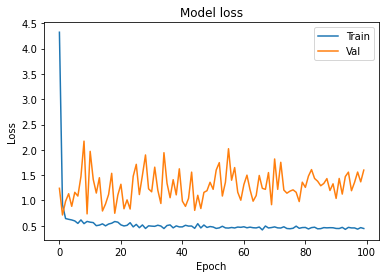

In [33]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

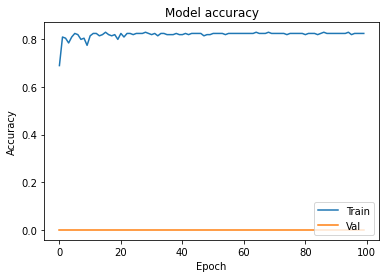

In [34]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

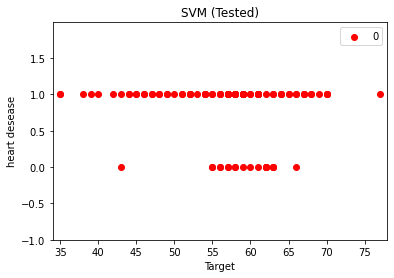

In [77]:
X_set, Y_set = testing_features, testing_labels  


X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(11)]).T

pred = model.predict(Xpred).reshape(X1.shape)   
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('white', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Tested)')
plt.xlabel('Target')
plt.ylabel('heart desease')
plt.legend()
plt.show()

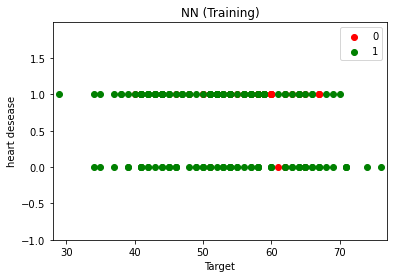

In [75]:
 
X_set, Y_set = training_features, training_labels  

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(11)]).T

pred = model.predict(Xpred).reshape(X1.shape)   
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('white', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Training)')
plt.xlabel('Target')
plt.ylabel('heart desease')
plt.legend()
plt.show()